# Notebook #6
## Ha sido creado con el fin de hacer análisis según porcentajes relativos en cada rango

NOTA: Dentro de la base de datos se usa el término "sensación", sin embargo en los textos de los gráficos q se sacan, esta palabra se cambia por "percepción". La sensación alude a la captura del estímulo fisiológico, mientras que la percepción es la respuesta que tiene una persona después de haber procesado sensación... implica una valoración ("tengo frío... tengo calor).

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path=("/Users/alejandronaranjo/OneDrive - Universidad de San Buenaventura Medellín/03. Investigación/08 Inv. Adaptabilidad/06 Python_adaptab/01 Datos")
os.listdir(path)
os.chdir(path)

In [3]:
ls

BaseCSV_adap_complem.csv
BaseCSV_adap_orig.csv
CSV_SinCartagena.csv
EPS_PercPref_Temp_Ciudad.eps
EPS_PercepPref_RelacVotosNormaliz.eps
Leyenda.png
PercPref_Temp_Ciudad.png
Perc_Ciudad_Sexo.png
PercepSensacPref_RelacVotosNormaliz_.png
PrefRelacVotosNormaliz.png
Pref_Ciudad_Sexo.png
ProcesamDatos_4Nov2019.xlsx*
SensPref_Temp_Ciudad.png
Sens_Ciudad_Sexo.png
SensacPref_RelacVotosNormaliz.png
SensacPref_RelacVotosNormaliz_Grises.png
SensacRelacVotosNormaliz.png
TempHumed_Ciudades.png
VotosNormalizadosSuma.csv
adapta_junio29.csv
sensac_pref_orig.csv
temperaturamedia_tabla.pdf


In [4]:
#lucas = pd.read_csv("adapta_junio29.csv",header=0)#, delim_whitespace=True)

lucas = pd.read_csv("adapta_junio29.csv", index_col='Unnamed: 0')

#lucas.info()
lucas.head()
lucas

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1
1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8
1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9
1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6


## Acá genero las tablas con los valores que necesito

### **1. ¿Existe relación entre la percepción térmica y la percepción del nivel lumínico?**

O... ¿Influye la Percepción térmica en la percepción del nivel lumínico?

In [5]:
sVis_sTer = lucas.pivot_table(index='SensaciónVisual',
                                      columns='SensaciónTérmica',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count', fill_value=0)
# es irrelevante cuál serie se ponga acá... independiente de la q ponga, 
# la tabla da lo mismo. Sin embargo, sino lo pongo, 
# se repite la misma información para cada serie

sVis_sTer

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
SensaciónVisual,,,,,,,
-2.0,1,4,3,15,3,5,0
-1.0,5,32,46,155,45,25,9
0.0,1,29,67,352,82,43,22
1.0,4,6,18,66,28,25,10
2.0,1,2,3,17,5,8,5


In [6]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_frio = sVis_sTer[-3]+sVis_sTer[-2]+sVis_sTer[-1]
suma_frio

#creo una columna que contiene resultado de esa suma
sVis_sTer["frio"]=suma_frio

suma_calor = sVis_sTer[3]+sVis_sTer[2]+sVis_sTer[1]
suma_calor
sVis_sTer["calor"]=suma_calor

sVis_sTer.rename(columns={0:"agradable"}, inplace=True)
sVis_sTer

# reorganizo y selecciono solo las columnas q me interesan
sVis_sTer = sVis_sTer[["frio","agradable","calor"]]
sVis_sTer

SensaciónTérmica,frio,agradable,calor
SensaciónVisual,,,
-2.0,8,15,8
-1.0,83,155,79
0.0,97,352,147
1.0,28,66,63
2.0,6,17,18


In [7]:
# Sumo filas en función de los rangos que me interesa construir:

oscuro = sVis_sTer.loc[-2] + sVis_sTer.loc[-1]
oscuro.name = "oscuro"
sVis_sTer = sVis_sTer.append([oscuro])

excesivo = sVis_sTer.loc[2.0] + sVis_sTer.loc[1.0]
excesivo.name = "excesivo"
sVis_sTer = sVis_sTer.append([excesivo])

# selecciono y reorganizo las filas q necesito:
sVis_sTer = sVis_sTer.reindex(["excesivo", 0, "oscuro"])

# renombro index
sVis_sTer = sVis_sTer.rename(index={0:"suficiente"})

sVis_sTer

SensaciónTérmica,frio,agradable,calor
excesivo,34,83,81
suficiente,97,352,147
oscuro,91,170,87


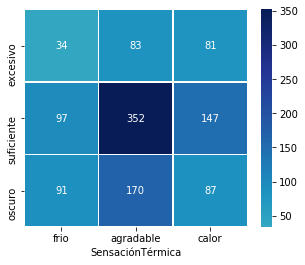

In [8]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(sVis_sTer, annot=True, fmt="d", linewidths=.5,
            ax=ax, cmap="YlGnBu", center=0)
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")

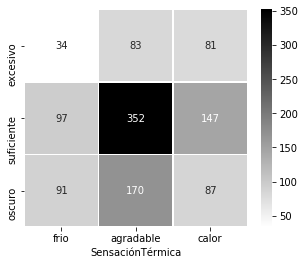

In [9]:
f, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(sVis_sTer, annot=True, fmt="d", linewidths=.5,
            ax=ax, cmap="binary")
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
# si quisiera q el colormap estuviera invertido:
# cmap="binary_r"

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

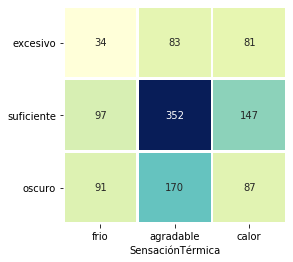

In [10]:
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(sVis_sTer, annot=True, fmt="d", linewidths=2,
            ax=ax, cmap="YlGnBu", cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
#plt.xticks(rotation=90)

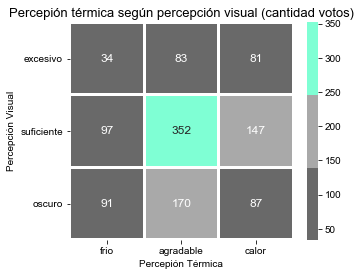

In [8]:
f, ax = plt.subplots(figsize=(5, 4))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(sVis_sTer, annot=True, fmt="d", linewidths=2,
            ax=ax, cmap=palette, 
            annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Percepción Visual")
plt.xlabel("Percepión Térmica")
plt.title("Percepión térmica según percepción visual (cantidad votos)", fontsize=13)

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

## Mostrando valores en porcentajes
Cada columna suma 100%

In [9]:
#Creo DF aparte para sacar porcentajes
sVis_sTer_porc = sVis_sTer
#sVis_sTer_porcent.info()

sVis_sTer_porc = (sVis_sTer_porc/sVis_sTer_porc[sVis_sTer_porc.columns].sum()*100).round(1)
#para q en el gráfico me salga como quiero, divido adicionalmente por 100
sVis_sTer_porc = ((sVis_sTer_porc/sVis_sTer_porc[sVis_sTer_porc.columns].sum()*100).round(1))/100
sVis_sTer_porc

#sVis_sTer_porc.rename(columns={"frio":"frio%","agradable":"agradable%","calor":"calor%"}, inplace=True)
#sVis_sTer_porc
#sVis_sTer_porc.info()

SensaciónTérmica,frio,agradable,calor
excesivo,0.153,0.137,0.257
suficiente,0.437,0.582,0.467
oscuro,0.410,0.281,0.276


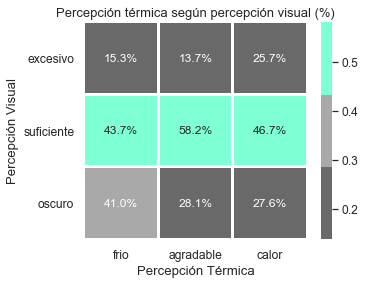

In [12]:
f, ax = plt.subplots(figsize=(5, 4))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(sVis_sTer_porc, annot=True, fmt=".1%", linewidths=2,
            ax=ax, cmap=palette, 
            annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Percepción Visual")
plt.xlabel("Percepción Térmica")
plt.title("Percepción térmica según percepción visual (%)", fontsize=13)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

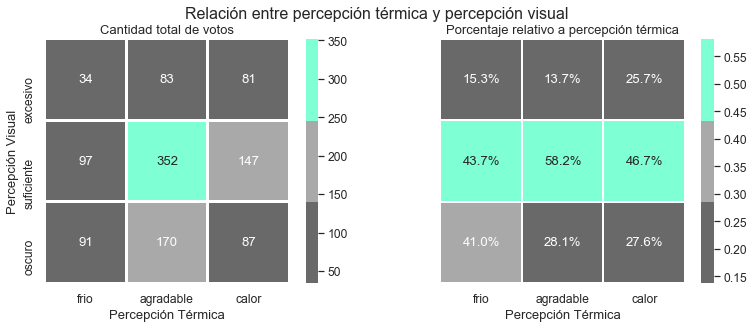

In [13]:
# Integrando en un solo gráfico los dos previos

#fig, (ax1, ax2) = plt.subplots(1,2)

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(13,4.5), sharey='row')


palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1 (cantidad de votos y cuenta absoluta)
sns.heatmap(sVis_sTer, annot=True, fmt="d", linewidths=2,
            ax=ax1, cmap=palette, square = True), 
ax1.set_ylabel("Percepción Visual", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Térmica", fontsize=13)
ax1.set_title("Cantidad total de votos", fontsize=13)

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero



# Gráfico 2
sVis_sTer_porc = sVis_sTer

sVis_sTer_porc = (sVis_sTer_porc/sVis_sTer_porc[sVis_sTer_porc.columns].sum()*100).round(1)
#para q en el gráfico me salga como quiero, divido adicionalmente por 100
sVis_sTer_porc = ((sVis_sTer_porc/sVis_sTer_porc[sVis_sTer_porc.columns].sum()*100).round(1))/100
sVis_sTer_porc

sns.heatmap(sVis_sTer_porc, annot=True, fmt=".1%", linewidths=1,
            ax=ax2, cmap=palette, square = True), 

ax2.set_xlabel("Percepción Térmica", fontsize=13)
ax2.set_title("Porcentaje relativo a percepción térmica", fontsize=13)

#ax2 = fig( sharex=ax1, frameon=False)

plt.suptitle("Relación entre percepción térmica y percepción visual", fontsize=16)


# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### Paréntesis... Alternativa
**Hacerlo de esta manera permitiría construir tablas síntesis con más control paso a paso**
Son mucho más engorrosas de hacer, pero de esta manera, uno podría verificar lo que se hizo arriba con PIVOT y MELT (q es una manera muy ágil)

In [33]:
frio = lucas.loc[((lucas["SensaciónTérmica"] < 0))]
#frio.describe()

agradable = lucas.loc[((lucas["SensaciónTérmica"] == 0))]

calor = lucas.loc[((lucas["SensaciónTérmica"] > 0))]
#calor

oscuro = lucas.loc[((lucas["SensaciónVisual"] < 0))]
#oscuro.describe()
#oscuro

suficiente = lucas.loc[((lucas["SensaciónVisual"] == 0))]
#suficiente

excesivo = lucas.loc[((lucas["SensaciónVisual"] > 0))]
excesivo

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
8,Armenia,F,17.0,1.0,0.5,0.0,1.0,0.0,1.00,-2.0,0.33,329.0,3.0,29.1,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Medellín,F,22.0,1.0,0.5,0.0,1.0,0.0,1.00,0.0,1.00,83.0,1.0,23.5,68.0
1099,Medellín,F,22.0,1.0,0.5,1.0,0.5,0.0,1.00,1.0,0.67,110.0,2.0,23.1,70.4
1100,Medellín,F,22.0,1.0,0.5,1.0,0.5,0.0,1.00,1.0,0.67,142.0,2.0,23.5,68.0
1101,Medellín,F,24.0,1.0,0.5,1.0,0.5,-1.0,0.67,1.0,0.67,-10.0,1.0,22.2,74.2


### Incluso ensayé otras alternativas pero finalmente no fueron necesarias

No obstante las dejo por acá para casos futuros: STACK y UNSTACK

i = vSensTer_rangos_stacked.unstack(fill_value=0)

vSensTer_rangos_stacked = vSensTer_rangos.stack()

y pasar de tabla pivotada a una más sencilla con "MELT"


.



### **2. ¿Existe alguna relación entre los votos de preferencia térmica con los de preferencia visual?**

In [14]:
pVis_pTer = lucas.pivot_table(index='PreferenciaVisual',
                                      columns='PreferenciaTérmica',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count', fill_value=0)


pVis_pTer

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
PreferenciaVisual,,,,,,,
-2.0,4,3,1,6,1,0,0
-1.0,3,17,8,39,6,2,0
0.0,32,62,110,232,29,14,4
1.0,32,52,80,156,45,8,0
2.0,19,28,39,74,21,15,0


In [15]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_frio_p = pVis_pTer[-3]+pVis_pTer[-2]+pVis_pTer[-1]
suma_frio_p

#creo una columna que contiene resultado de esa suma
pVis_pTer["frio"]=suma_frio_p

suma_calor_p = pVis_pTer[3]+pVis_pTer[2]+pVis_pTer[1]
suma_calor_p
pVis_pTer["calor"]=suma_calor_p

pVis_pTer.rename(columns={0:"agradable"}, inplace=True)
pVis_pTer

# reorganizo y selecciono solo las columnas q me interesan
pVis_pTer = pVis_pTer[["frio","agradable","calor"]]
pVis_pTer

PreferenciaTérmica,frio,agradable,calor
PreferenciaVisual,,,
-2.0,8,6,1
-1.0,28,39,8
0.0,204,232,47
1.0,164,156,53
2.0,86,74,36


In [16]:
# Sumo filas en función de los rangos que me interesa construir:

menos_ilu = pVis_pTer.loc[-2] + pVis_pTer.loc[-1]
menos_ilu.name = "menos iluminado"
pVis_pTer = pVis_pTer.append([menos_ilu])

mas_ilu = pVis_pTer.loc[2.0] + pVis_pTer.loc[1.0]
mas_ilu.name = "más iluminado"
pVis_pTer = pVis_pTer.append([mas_ilu])

# selecciono y reorganizo las filas q necesito:
pVis_pTer = pVis_pTer.reindex(["más iluminado", 0, "menos iluminado"])

# renombro index
pVis_pTer = pVis_pTer.rename(index={0:"ni más ni menos"})

pVis_pTer

PreferenciaTérmica,frio,agradable,calor
más iluminado,250,230,89
ni más ni menos,204,232,47
menos iluminado,36,45,9


In [17]:
#Sacando porcentajes (cada columna suma 100%)
#Creo DF aparte para sacar porcentajes
pVis_pTer_porc = pVis_pTer
#sVis_sTer_porcent.info()

#para q en el gráfico me salga como quiero, divido adicionalmente por 100
pVis_pTer_porc = ((pVis_pTer_porc/pVis_pTer_porc[pVis_pTer_porc.columns].sum()*100).round(1))/100
pVis_pTer_porc


PreferenciaTérmica,frio,agradable,calor
más iluminado,0.510,0.454,0.614
ni más ni menos,0.416,0.458,0.324
menos iluminado,0.073,0.089,0.062


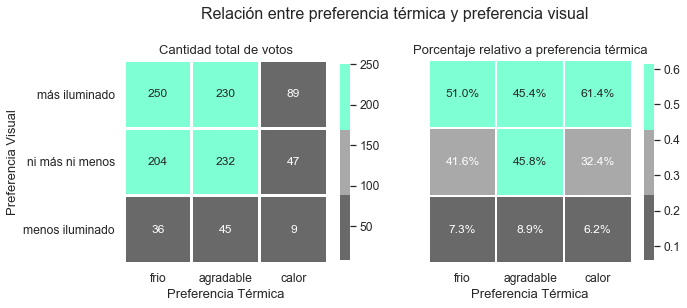

In [18]:
# Graficando los dos de preferencia previos

#fig, (ax1, ax2) = plt.subplots(1,2)

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(10,4.5), sharey='row')


palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1 (cantidad de votos y cuenta absoluta)
sns.heatmap(pVis_pTer, annot=True, fmt="d", linewidths=2,
            ax=ax1, cmap=palette, annot_kws={"size": 12}, square = True,
           cbar_kws={"shrink": .8}), 
ax1.set_ylabel("Preferencia Visual", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Preferencia Térmica", fontsize=13)
ax1.set_title("Cantidad total de votos", fontsize=13)

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero



# Gráfico 2
#pVis_pTer_porc

sns.heatmap(pVis_pTer_porc, annot=True, fmt=".1%", linewidths=1,
            ax=ax2, cmap=palette, annot_kws={"size": 12}, square = True,
           cbar_kws={"shrink": .8}), 

ax2.set_xlabel("Preferencia Térmica", fontsize=13)
ax2.set_title("Porcentaje relativo a preferencia térmica", fontsize=13)

plt.suptitle("Relación entre preferencia térmica y preferencia visual", fontsize=16)


# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

*<font color="red">
**Más abajo, después de pregunta 6, vuelvo sobre este gráfico, trabajando en el eje X con "zona de confort adaptativo"**
</font>*

### **Integración de 1 y 2. ¿Cómo se distribuyen los votos de percepción y preferencia térmica y visual?**

In [31]:
#recuerdo DF
sVis_sTer

SensaciónTérmica,frio,agradable,calor
excesivo,34,83,81
suficiente,97,352,147
oscuro,91,170,87


In [97]:
sVis_sTer_reorder = sVis_sTer

#reorganizo para que en el gráfico final me aparezca como quiero el eje Y

new_index_sens = ['oscuro', 'suficiente', 'excesivo']

sVis_sTer_reorder = sVis_sTer_reorder.reindex(new_index_sens)

sVis_sTer_reorder

SensaciónTérmica,frio,agradable,calor
oscuro,91,170,87
suficiente,97,352,147
excesivo,34,83,81


In [98]:
#lo visualizo de otra manera para verificar lo q hago más abajo
S = sVis_sTer_reorder.unstack()
print(S)

SensaciónTérmica            
frio              oscuro         91
                  suficiente     97
                  excesivo       34
agradable         oscuro        170
                  suficiente    352
                  excesivo       83
calor             oscuro         87
                  suficiente    147
                  excesivo       81
dtype: int64


In [99]:
#Extraigo datos para llevarlos a un DF desde el cual pueda hacer el gráfico q necesito
A = sVis_sTer_reorder.melt()
A
A.rename(columns={"value":"SumaSens"}, inplace=True)
A

,SensaciónTérmica,SumaSens
0,frio,91
1,frio,97
2,frio,34
3,agradable,170
4,agradable,352
5,agradable,83
6,calor,87
7,calor,147
8,calor,81


In [100]:
#Genero serie a partir de una "lista" q escribo con base a lo q obtengo con "unstack")
SensVisual = ['oscuro', 'suficiente', 'excesivo', 'oscuro', 'suficiente', 'excesivo', 'oscuro', 'suficiente', 'excesivo']
SensVisual

#la sumo al DF construido en el paso anterior
A['SensaciónVisual'] = SensVisual
A

#Reorganizo la manera en q aparecen las columnas
A = A[['SensaciónTérmica', 'SensaciónVisual', 'SumaSens']]
A

,SensaciónTérmica,SensaciónVisual,SumaSens
0,frio,oscuro,91
1,frio,suficiente,97
2,frio,excesivo,34
3,agradable,oscuro,170
4,agradable,suficiente,352
5,agradable,excesivo,83
6,calor,oscuro,87
7,calor,suficiente,147
8,calor,excesivo,81


In [95]:
# Ahora voy con el mismo proceso para los votos de preferencia:

pVis_pTer_reorder = pVis_pTer

#reorganizo para que en el gráfico final me aparezca como quiero el eje Y

new_index = ['menos iluminado', 'ni más ni menos', 'más iluminado']

pVis_pTer_reorder = pVis_pTer_reorder.reindex(new_index)

pVis_pTer_reorder

PreferenciaTérmica,frio,agradable,calor
menos iluminado,36,45,9
ni más ni menos,204,232,47
más iluminado,250,230,89


In [96]:
T = pVis_pTer_reorder.unstack()
print(T)

PreferenciaTérmica                 
frio                menos iluminado     36
                    ni más ni menos    204
                    más iluminado      250
agradable           menos iluminado     45
                    ni más ni menos    232
                    más iluminado      230
calor               menos iluminado      9
                    ni más ni menos     47
                    más iluminado       89
dtype: int64


In [92]:
B = pVis_pTer_reorder.melt()
B
B.rename(columns={"value":"SumaPref"}, inplace=True)
B

,PreferenciaTérmica,SumaPref
0,frio,36
1,frio,204
2,frio,250
3,agradable,45
4,agradable,232
5,agradable,230
6,calor,9
7,calor,47
8,calor,89


In [94]:
B
PrefVisual = ['menos iluminado', 'ni más ni menos', 'más iluminado', 'menos iluminado', 'ni más ni menos', 
              'más iluminado', 'menos iluminado', 'ni más ni menos', 'más iluminado',]
PrefVisual

B['PreferenciaVisual'] = PrefVisual
B

B = B[['PreferenciaTérmica', 'PreferenciaVisual', 'SumaPref']]
B

,PreferenciaTérmica,PreferenciaVisual,SumaPref
0,frio,menos iluminado,36
1,frio,ni más ni menos,204
2,frio,más iluminado,250
3,agradable,menos iluminado,45
4,agradable,ni más ni menos,232
5,agradable,más iluminado,230
6,calor,menos iluminado,9
7,calor,ni más ni menos,47
8,calor,más iluminado,89


In [101]:
# Integro los 2 DF creados en los pasos anteriores
C = pd.concat([A, B], axis=1)
C

,SensaciónTérmica,SensaciónVisual,SumaSens,PreferenciaTérmica,PreferenciaVisual,SumaPref
0,frio,oscuro,91,frio,menos iluminado,36
1,frio,suficiente,97,frio,ni más ni menos,204
2,frio,excesivo,34,frio,más iluminado,250
3,agradable,oscuro,170,agradable,menos iluminado,45
4,agradable,suficiente,352,agradable,ni más ni menos,232
5,agradable,excesivo,83,agradable,más iluminado,230
6,calor,oscuro,87,calor,menos iluminado,9
7,calor,suficiente,147,calor,ni más ni menos,47
8,calor,excesivo,81,calor,más iluminado,89


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

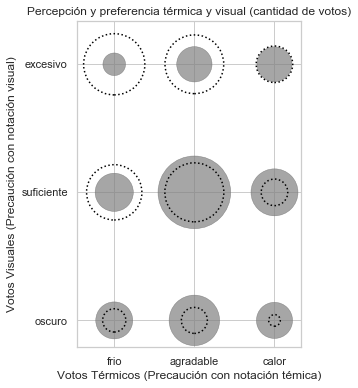

In [103]:
# Creo gráfico integrando Percepción y Preferencia en rangos para artículo

sns.set(style="whitegrid")

fig,ax=plt.subplots(figsize=(4,6))

x=C['SensaciónTérmica']
y=C['SensaciónVisual']
sens=C["SumaSens"]
pref=C["SumaPref"]
 
plt.title("Percepción y preferencia térmica y visual (cantidad de votos)")
plt.xlabel("Votos Térmicos (Precaución con notación témica)")
plt.ylabel("Votos Visuales (Precaución con notación visual)")

plt.scatter(x, y, s=sens*15, c="grey", alpha=0.7, edgecolor="dimgrey", linewidth=0.5, label = "Percepción")
plt.scatter(x, y, s=pref*15, c="None", edgecolors="black",linewidth=1.5, linestyle=':', label="Preferencia")

#plt.fig.savefig('EPS_PercepPref_RelacVotosNormaliz.eps', format='eps',  transparent=True, dpi=300)
plt.savefig('EPS_PercPref_RelacVotosRANGOS.eps', format='eps',  transparent=True, dpi=300)

### **3. ¿Cómo se distribuyen los votos de percepción térmica según los rangos de iluminancia?**

In [148]:
vSensTer_rangos = lucas.pivot_table(index='Rango_EV_media',
                                      columns='SensaciónTérmica',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count')

vSensTer_rangos

# Estos valores fueron corroborados uno a uno con una de las tablas
# que hice paso a paso y q me tomó muuuucho tiempo en Excel. 
# Con esto corroboré q se está haciendo el cálculo q necesito
# hay ligeras variaciones, pero es pq en Excel no se eliminaron unos votos
# que sí se eliminaron en Python al encontrar algún tipo de "error/incosistencia" 

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
1.0,1.0,25.0,49.0,188.0,32.0,11.0,3.0
2.0,9.0,35.0,44.0,220.0,64.0,36.0,17.0
3.0,NaN,6.0,18.0,91.0,26.0,25.0,11.0
4.0,1.0,5.0,13.0,60.0,28.0,27.0,11.0
5.0,1.0,2.0,13.0,46.0,13.0,7.0,4.0


In [149]:
vSensTer_rangos = vSensTer_rangos.reindex([5,4,3,2,1])
vSensTer_rangos

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,1.0,2.0,13.0,46.0,13.0,7.0,4.0
4,1.0,5.0,13.0,60.0,28.0,27.0,11.0
3,NaN,6.0,18.0,91.0,26.0,25.0,11.0
2,9.0,35.0,44.0,220.0,64.0,36.0,17.0
1,1.0,25.0,49.0,188.0,32.0,11.0,3.0


In [150]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

#vSensTer_rangos_porc = vSensTer_rangos.div(vSensTer_rangos.sum(axis=1), axis=0).mul(100).round(1)
vSensTer_rangos_porc = vSensTer_rangos.div(vSensTer_rangos.sum(axis=1), axis=0).round(3)
vSensTer_rangos_porc

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.012,0.023,0.151,0.535,0.151,0.081,0.047
4,0.007,0.034,0.090,0.414,0.193,0.186,0.076
3,NaN,0.034,0.102,0.514,0.147,0.141,0.062
2,0.021,0.082,0.104,0.518,0.151,0.085,0.040
1,0.003,0.081,0.159,0.608,0.104,0.036,0.010


In [151]:
# Con esto verifico q los porcentajes se sacan en función de c/fila
# (al sumar todos los valores de una fila me da "100")
vSensTer_rangos_porc.sum(axis=1)

# Si sumara por columnas los porcentajes no me daría "100"
# vSensTer_rangos_porc.sum()

Rango_EV_media
5    1.000
4    1.000
3    1.000
2    1.001
1    1.001
dtype: float64

In [152]:
# Reemplazar "NaN" por "0" por si las:

vSensTer_rangos_porc = vSensTer_rangos_porc.fillna(0)
vSensTer_rangos_porc

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.012,0.023,0.151,0.535,0.151,0.081,0.047
4,0.007,0.034,0.090,0.414,0.193,0.186,0.076
3,0.000,0.034,0.102,0.514,0.147,0.141,0.062
2,0.021,0.082,0.104,0.518,0.151,0.085,0.040
1,0.003,0.081,0.159,0.608,0.104,0.036,0.010


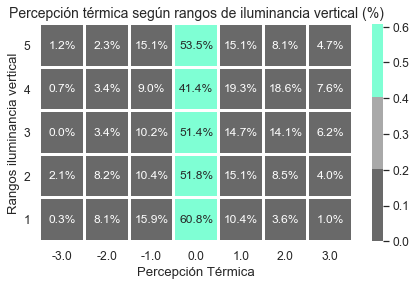

In [153]:
f, ax = plt.subplots(figsize=(7, 4))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vSensTer_rangos_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax, cmap=palette), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Rangos iluminancia vertical")
plt.xlabel("Percepción Térmica")
plt.title("Percepción térmica según rangos de iluminancia vertical (%)", fontsize=14)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### **3.B. ¿Cómo se distribuyen los votos de percepción térmica (EN RANGOS) según los rangos de iluminancia?**

In [157]:
vSensTer_rangos = vSensTer_rangos.fillna(0)
vSensTer_rangosB = vSensTer_rangos
vSensTer_rangosB

SensaciónTérmica,-3.0,-2.0,-1.0,agradable,1.0,2.0,3.0,frio,calor
Rango_EV_media,,,,,,,,,
5,1.0,2.0,13.0,46.0,13.0,7.0,4.0,16.0,24.0
4,1.0,5.0,13.0,60.0,28.0,27.0,11.0,19.0,66.0
3,0.0,6.0,18.0,91.0,26.0,25.0,11.0,24.0,62.0
2,9.0,35.0,44.0,220.0,64.0,36.0,17.0,88.0,117.0
1,1.0,25.0,49.0,188.0,32.0,11.0,3.0,75.0,46.0


In [158]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_frioB_s = vSensTer_rangosB[-3]+vSensTer_rangosB[-2]+vSensTer_rangosB[-1]
suma_frioB_s

#creo una columna que contiene resultado de esa suma
vSensTer_rangosB["frio"]=suma_frioB_s

suma_calorB_s = vSensTer_rangosB[+3]+vSensTer_rangosB[+2]+vSensTer_rangosB[+1]
suma_calorB_s
vSensTer_rangosB["calor"]=suma_calorB_s

vSensTer_rangosB

vSensTer_rangosB.rename(columns={0:"agradable"}, inplace=True)
vSensTer_rangosB

# reorganizo y selecciono solo las columnas q me interesan
vSensTer_rangosB = vSensTer_rangosB[["frio","agradable","calor"]]
vSensTer_rangosB

SensaciónTérmica,frio,agradable,calor
Rango_EV_media,,,
5,16.0,46.0,24.0
4,19.0,60.0,66.0
3,24.0,91.0,62.0
2,88.0,220.0,117.0
1,75.0,188.0,46.0


In [159]:
vSensTer_rangosB.sum()

SensaciónTérmica
frio         222.0
agradable    605.0
calor        315.0
dtype: float64

In [160]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

vSensTer_rangosB_porc = vSensTer_rangosB.div(vSensTer_rangosB.sum(axis=1), axis=0).round(3)
vSensTer_rangosB_porc

SensaciónTérmica,frio,agradable,calor
Rango_EV_media,,,
5,0.186,0.535,0.279
4,0.131,0.414,0.455
3,0.136,0.514,0.350
2,0.207,0.518,0.275
1,0.243,0.608,0.149


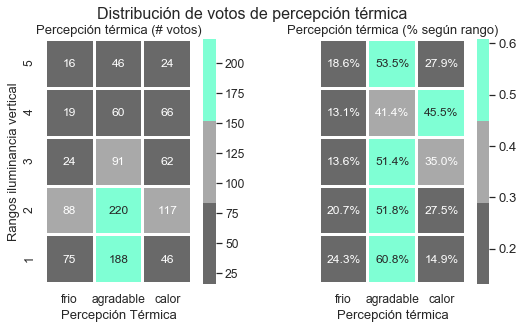

In [161]:
# Graficando percepción (#votos y %) según rangos de iluminancia vert.

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(9,4.5), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vSensTer_rangosB, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square = True,)
ax1.set_ylabel("Rangos iluminancia vertical", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Térmica", fontsize=13)
ax1.set_title("Percepción térmica (# votos)", fontsize=13)


# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.2) #con este final/ logro el q quiero



# Gráfico 2
sns.heatmap(vSensTer_rangosB_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square = True), 
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Percepción térmica", fontsize=13)
ax2.set_title("Percepción térmica (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de percepción térmica", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### **4. ¿Cómo se distribuyen los votos de preferencia térmica según los rangos de iluminancia?**

In [162]:
vPrefTer_rangos = lucas.pivot_table(index='Rango_EV_media',
                                      columns='PreferenciaTérmica',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count')

vPrefTer_rangos

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
1.0,8.0,36.0,68.0,140.0,43.0,14.0,NaN
2.0,43.0,51.0,86.0,201.0,28.0,12.0,4.0
3.0,17.0,33.0,34.0,72.0,13.0,8.0,NaN
4.0,15.0,34.0,32.0,53.0,8.0,3.0,NaN
5.0,7.0,8.0,18.0,41.0,10.0,2.0,NaN


In [163]:
vPrefTer_rangos = vPrefTer_rangos.reindex([5,4,3,2,1])
vPrefTer_rangos

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,7.0,8.0,18.0,41.0,10.0,2.0,NaN
4,15.0,34.0,32.0,53.0,8.0,3.0,NaN
3,17.0,33.0,34.0,72.0,13.0,8.0,NaN
2,43.0,51.0,86.0,201.0,28.0,12.0,4.0
1,8.0,36.0,68.0,140.0,43.0,14.0,NaN


In [164]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

#vPrefTer_rangos_porc = vSensTer_rangos.div(vSensTer_rangos.sum(axis=1), axis=0).mul(100).round(1)
vPrefTer_rangos_porc = vPrefTer_rangos.div(vPrefTer_rangos.sum(axis=1), axis=0).round(3)
vPrefTer_rangos_porc

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.081,0.093,0.209,0.477,0.116,0.023,NaN
4,0.103,0.234,0.221,0.366,0.055,0.021,NaN
3,0.096,0.186,0.192,0.407,0.073,0.045,NaN
2,0.101,0.120,0.202,0.473,0.066,0.028,0.009
1,0.026,0.117,0.220,0.453,0.139,0.045,NaN


In [165]:
# Con esto verifico q los porcentajes se sacan en función de c/fila
# (al sumar todos los valores de una fila me da "100")
vPrefTer_rangos_porc.sum(axis=1)

# Si sumara por columnas los porcentajes no me daría "100"
#vPrefTer_rangos_porc.sum()

Rango_EV_media
5    0.999
4    1.000
3    0.999
2    0.999
1    1.000
dtype: float64

In [166]:
# Reemplazar "NaN" por "0" por si las:

vPrefTer_rangos_porc = vPrefTer_rangos_porc.fillna(0)
vPrefTer_rangos_porc

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.081,0.093,0.209,0.477,0.116,0.023,0.000
4,0.103,0.234,0.221,0.366,0.055,0.021,0.000
3,0.096,0.186,0.192,0.407,0.073,0.045,0.000
2,0.101,0.120,0.202,0.473,0.066,0.028,0.009
1,0.026,0.117,0.220,0.453,0.139,0.045,0.000


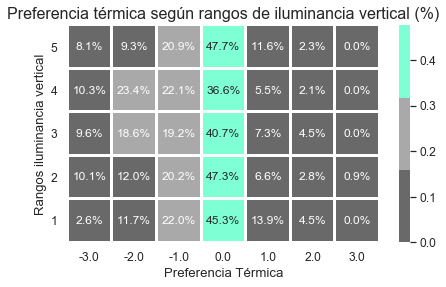

In [167]:
f, ax = plt.subplots(figsize=(7, 4))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vPrefTer_rangos_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax, cmap=palette), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Rangos iluminancia vertical")
plt.xlabel("Preferencia Térmica")
plt.title("Preferencia térmica según rangos de iluminancia vertical (%)", fontsize=16)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### Uniendo gráficos de Percepción y Preferencia según rango de ilum. vertical

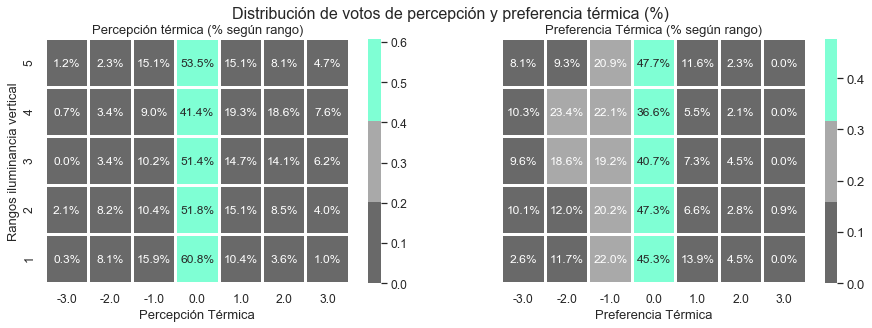

In [168]:
# Graficando juntos Percepción y preferencia según rangos de iluminancia vert.

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(15,4.5), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vSensTer_rangos_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax1, cmap=palette),
ax1.set_ylabel("Rangos iluminancia vertical", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Térmica", fontsize=13)
ax1.set_title("Percepción térmica (% según rango)", fontsize=13)


# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.2) #con este final/ logro el q quiero



# Gráfico 2
sns.heatmap(vPrefTer_rangos_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette), 
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Preferencia Térmica", fontsize=13)
ax2.set_title("Preferencia Térmica (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de percepción y preferencia térmica (%)", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### **4.B. ¿Cómo se distribuyen los votos de preferencia térmica (EN RANGOS) según los rangos de iluminancia?**

In [169]:
# Creo otro DF para no dañar lo q está arriba

vPrefTer_rangosB = vPrefTer_rangos

vPrefTer_rangosB = vPrefTer_rangosB.fillna(0) 

vPrefTer_rangosB

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,7.0,8.0,18.0,41.0,10.0,2.0,0.0
4,15.0,34.0,32.0,53.0,8.0,3.0,0.0
3,17.0,33.0,34.0,72.0,13.0,8.0,0.0
2,43.0,51.0,86.0,201.0,28.0,12.0,4.0
1,8.0,36.0,68.0,140.0,43.0,14.0,0.0


In [170]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_frioB_p = vPrefTer_rangosB[-3]+vPrefTer_rangosB[-2]+vPrefTer_rangosB[-1]
suma_frioB_p

#creo una columna que contiene resultado de esa suma
vPrefTer_rangosB["frio"]=suma_frioB_p

suma_calorB_p = vPrefTer_rangosB[+3]+vPrefTer_rangosB[+2]+vPrefTer_rangosB[+1]
suma_calorB_p
vPrefTer_rangosB["calor"]=suma_calorB_p

vPrefTer_rangosB

vPrefTer_rangosB.rename(columns={0:"agradable"}, inplace=True)
vPrefTer_rangosB

# reorganizo y selecciono solo las columnas q me interesan
vPrefTer_rangosB = vPrefTer_rangosB[["frio","agradable","calor"]]
vPrefTer_rangosB

PreferenciaTérmica,frio,agradable,calor
Rango_EV_media,,,
5,33.0,41.0,12.0
4,81.0,53.0,11.0
3,84.0,72.0,21.0
2,180.0,201.0,44.0
1,112.0,140.0,57.0


In [171]:
vPrefTer_rangosB.sum()

PreferenciaTérmica
frio         490.0
agradable    507.0
calor        145.0
dtype: float64

In [172]:
vPrefTer_rangos_porc

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.081,0.093,0.209,0.477,0.116,0.023,0.000
4,0.103,0.234,0.221,0.366,0.055,0.021,0.000
3,0.096,0.186,0.192,0.407,0.073,0.045,0.000
2,0.101,0.120,0.202,0.473,0.066,0.028,0.009
1,0.026,0.117,0.220,0.453,0.139,0.045,0.000


In [173]:
vPrefTer_rangosB_porc = vPrefTer_rangos_porc

vPrefTer_rangosB_porc = vPrefTer_rangosB_porc.fillna(0) 

vPrefTer_rangosB_porc

PreferenciaTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Rango_EV_media,,,,,,,
5,0.081,0.093,0.209,0.477,0.116,0.023,0.000
4,0.103,0.234,0.221,0.366,0.055,0.021,0.000
3,0.096,0.186,0.192,0.407,0.073,0.045,0.000
2,0.101,0.120,0.202,0.473,0.066,0.028,0.009
1,0.026,0.117,0.220,0.453,0.139,0.045,0.000


In [174]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_frioB_p_porc = vPrefTer_rangosB_porc[-3]+vPrefTer_rangosB_porc[-2]+vPrefTer_rangosB_porc[-1]
suma_frioB_p_porc

#creo una columna que contiene resultado de esa suma
vPrefTer_rangosB_porc["frio"]=suma_frioB_p_porc

suma_calorB_p_porc = vPrefTer_rangosB_porc[+3]+vPrefTer_rangosB_porc[+2]+vPrefTer_rangosB_porc[+1]
suma_calorB_p_porc
vPrefTer_rangosB_porc["calor"]=suma_calorB_p_porc

vPrefTer_rangosB_porc

vPrefTer_rangosB_porc.rename(columns={0:"agradable"}, inplace=True)
vPrefTer_rangosB_porc

# reorganizo y selecciono solo las columnas q me interesan
vPrefTer_rangosB_porc = vPrefTer_rangosB_porc[["frio","agradable","calor"]]
vPrefTer_rangosB_porc

PreferenciaTérmica,frio,agradable,calor
Rango_EV_media,,,
5,0.383,0.477,0.139
4,0.558,0.366,0.076
3,0.474,0.407,0.118
2,0.423,0.473,0.103
1,0.363,0.453,0.184


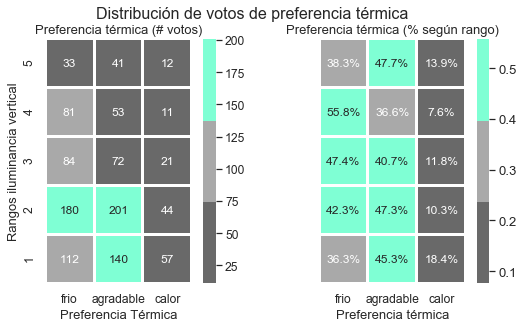

In [175]:
# Graficando preferencia (#votos y %) según rangos de iluminancia vert.

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(9,4.5), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vPrefTer_rangosB, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square = True,)
ax1.set_ylabel("Rangos iluminancia vertical", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Preferencia Térmica", fontsize=13)
ax1.set_title("Preferencia térmica (# votos)", fontsize=13)


# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.2) #con este final/ logro el q quiero



# Gráfico 2
sns.heatmap(vPrefTer_rangosB_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square = True), 
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Preferencia térmica", fontsize=13)
ax2.set_title("Preferencia térmica (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de preferencia térmica", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero


### **5. ¿Cómo se distribuyen los votos de percepción visual según la temperatura?**

In [62]:
vPercVis_temp = lucas.pivot_table(index='TEMP',
                                      columns='SensaciónVisual',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count')

#vPercVis_temp.sum()
vPercVis_temp

SensaciónVisual,-2.0,-1.0,0.0,1.0,2.0
TEMP,,,,,
21.2,NaN,7.0,5.0,NaN,NaN
21.4,NaN,4.0,4.0,1.0,NaN
21.7,NaN,14.0,14.0,7.0,1.0
21.9,1.0,18.0,15.0,NaN,NaN
22.0,NaN,3.0,4.0,2.0,NaN
...,...,...,...,...,...
29.4,1.0,1.0,3.0,3.0,NaN
29.9,1.0,3.0,5.0,3.0,NaN
30.2,1.0,8.0,9.0,4.0,NaN


In [63]:
# creo filas que contienen una suma de votos con diferentes criterios
# dependiendo del rango de temperaturas

#temp21 = vPercVis_temp.loc[vPercVis_temp.index < 21]
#temp21 = temp21.sum()
#temp21.name = "temp<21"

temp21_23 = vPercVis_temp.loc[(vPercVis_temp.index >= 21) & (vPercVis_temp.index < 23)]
temp21_23 = temp21_23.sum()
temp21_23.name = "temp21<=x<23"

temp23_25 = vPercVis_temp.loc[(vPercVis_temp.index >= 23) & (vPercVis_temp.index < 25)]
temp23_25 = temp23_25.sum()
temp23_25.name = "temp23<=x<25"

temp25_27 = vPercVis_temp.loc[(vPercVis_temp.index >= 25) & (vPercVis_temp.index < 27)]
temp25_27 = temp25_27.sum()
temp25_27.name = "temp25<=x<27"

temp27_29 = vPercVis_temp.loc[(vPercVis_temp.index >= 27) & (vPercVis_temp.index < 29)]
temp27_29 = temp27_29.sum()
temp27_29.name = "temp27<=x<29"

temp29 = vPercVis_temp.loc[vPercVis_temp.index >= 29]
temp29 = temp29.sum()
temp29.name = "temp>29"

# añado esas filas al DF
#vPercVis_temp = vPercVis_temp.append([temp29, temp27_29, temp25_27, temp23_25, temp21_23, temp21])
#vPercVis_temp

vPercVis_temp = vPercVis_temp.append([temp29, temp27_29, temp25_27, temp23_25, temp21_23])
vPercVis_temp

vPercVis_temp = vPercVis_temp.reindex(["temp>29", "temp27<=x<29", "temp25<=x<27", 
                                       "temp23<=x<25", "temp21<=x<23"])

#vPercVis_temp.sum()
vPercVis_temp

SensaciónVisual,-2.0,-1.0,0.0,1.0,2.0
temp>29,4.0,31.0,60.0,26.0,5.0
temp27<=x<29,10.0,93.0,116.0,45.0,6.0
temp25<=x<27,10.0,73.0,115.0,17.0,10.0
temp23<=x<25,6.0,64.0,218.0,47.0,17.0
temp21<=x<23,1.0,56.0,87.0,22.0,3.0


In [64]:
# Para confirmar que dentro de la selección están los 1142 votos
# con los q estoy trabajando (ni más, ni menos), hago lo siguiente

t = vPercVis_temp
t.sum()

SensaciónVisual
-2.0     31.0
-1.0    317.0
 0.0    596.0
 1.0    157.0
 2.0     41.0
dtype: float64

In [65]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

vPercVis_temp_porc = vPercVis_temp.div(vPercVis_temp.sum(axis=1), axis=0).round(3)

vPercVis_temp_porc = vPercVis_temp_porc.fillna(0)
vPercVis_temp_porc

SensaciónVisual,-2.0,-1.0,0.0,1.0,2.0
temp>29,0.032,0.246,0.476,0.206,0.040
temp27<=x<29,0.037,0.344,0.430,0.167,0.022
temp25<=x<27,0.044,0.324,0.511,0.076,0.044
temp23<=x<25,0.017,0.182,0.619,0.134,0.048
temp21<=x<23,0.006,0.331,0.515,0.130,0.018


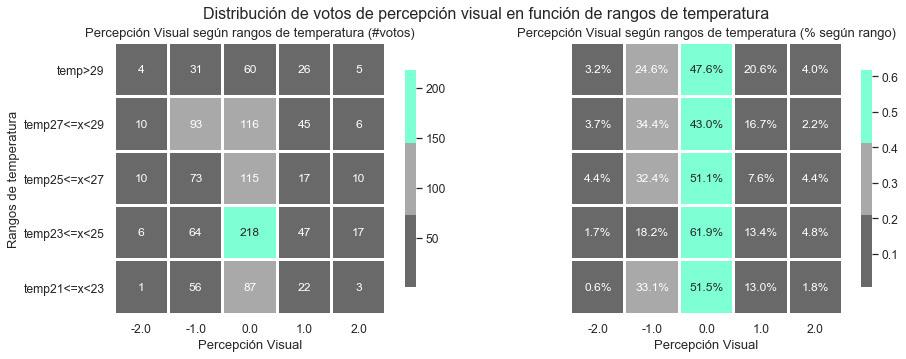

In [89]:
# Graficando percepcion visual tanto en #votos como porcentajes relativos a rango

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(15,5), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vPercVis_temp, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square=True, #con square garantizo q la celda salga cuadrada y no se deforme
            cbar=True, cbar_kws={"shrink": .8}), #con este controlo el tamaño la altura de la leyenda
ax1.set_ylabel("Rangos de temperatura", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Visual", fontsize=13)
ax1.set_title("Percepción Visual según rangos de temperatura (#votos)", fontsize=13)


# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero


# Gráfico 2
sns.heatmap(vPercVis_temp_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square=True,
           cbar=True, cbar_kws={"shrink": .8}), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Percepción Visual", fontsize=13)
ax2.set_title("Percepción Visual según rangos de temperatura (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de percepción visual en función de rangos de temperatura", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

## Lo anterior se hizo con rangos de temperatura aleatorios
Posibilidad de reagrupar esos datos en fxn de zona de confort para cada ciudad con datos de las normales climatológicas

### **6. ¿Cómo se distribuyen los votos de percepción visual según rangos de confort adapatativo?**

**TEMPERATURA MEDIA ANUAL:**

Datos tomados de los aeropuertos de las ciudades en las que se realizaron las mediciones

Medellín = 22.5ºC

Armenia = 22.1ºC

Manizales = 17ºC



**TEMPERATURA NEUTRAL:**

Tn =  17.8 + 0.31 * tpma

ZONA DE CONFORT:
Tn +/- 2.5ºC

In [106]:
#temperatura media prevaleciente:
tpma_med = 22.5
tpma_arm = 22.1
tpma_man = 17

#temperatura neutral:
tn_med = 17.8 + 0.31*tpma_med
tn_arm = 17.8 + 0.31*tpma_arm
tn_man = 17.8 + 0.31*tpma_man

#zona de confort:
zc_med_inf = tn_med - 2.5
zc_med_sup = tn_med + 2.5
print("zc_med_inf", zc_med_inf)
print("zc_med_sup", zc_med_sup)

zc_arm_inf = tn_arm - 2.5
zc_arm_sup = tn_arm + 2.5
print("zc_arm_inf", zc_arm_inf)
print("zc_arm_sup", zc_arm_sup)

zc_man_inf = tn_man - 2.5
zc_man_sup = tn_man + 2.5
print("zc_man_inf", zc_man_inf)
print("zc_man_sup", zc_man_sup)

zc_med_inf 22.275
zc_med_sup 27.275
zc_arm_inf 22.151
zc_arm_sup 27.151
zc_man_inf 20.57
zc_man_sup 25.57


### Creación de series en función de temperatura de c/ciudad
Ahora es necesario que desde el DF del inicio ("lucas") se cree una columna con unos condicionales que a su vez están dentro de otro condicional para cada ciudad:

1). Si la "Ciudad" es Armenia / Si la "Ciudad" es Medellín / Si la "Ciudad" es Manizales

2). si es mayor que zc_xxx_sup = calor /
si está entre zc_xxx_inf y zc_xxx_sup = confort /
si es menor que zc_xxx_inf = frio

In [107]:
# Crearé DF independiente para no ir a dañar cosas q se han hecho en pasos previos
zc = lucas
zc

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
0,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,796.0,4.0,28.9,50.2
1,Armenia,F,23.0,2.0,0.0,-1.0,0.5,2.0,0.33,-2.0,0.33,779.0,4.0,29.1,50.2
2,Armenia,F,23.0,1.0,0.5,-1.0,0.5,2.0,0.33,-2.0,0.33,530.0,4.0,29.2,50.7
3,Armenia,F,23.0,1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,622.0,4.0,29.4,50.0
4,Armenia,M,20.0,0.0,1.0,1.0,0.5,3.0,0.00,-1.0,0.67,202.0,2.0,28.9,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Medellín,M,21.0,-1.0,0.5,2.0,0.0,1.0,0.67,-2.0,0.33,36.0,1.0,26.5,66.1
1138,Medellín,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,-31.0,1.0,27.1,67.8
1139,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,-23.0,1.0,26.7,68.9
1140,Medellín,M,20.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,-47.0,1.0,26.5,68.6


In [101]:
# Ruta de lo q puedo hacer:
# 1). Buscar en columna "ciudad" por el nombre de c/ciudad
#         o puedo buscar con el doble criterio:
#                si está en tal Ciudad y la temp es tal
# 2). Dependiendo de esa selección se evaluará diferente la columna de TEMP
# 3). Dependiendo del valor de la selección cree una columna que 
#         diga si es calor, frío o confort

In [108]:
# Ejercicio con ARMENIA a partir de DF que separo y vuelvo a concatener luego

# Creo DF´s con dos condiciones (Ciudad y TEMP):

# En el caso de Armenia no hay valores por debajo de la zona de confort
# pero igual lo creo para tenerlo estandarizado para las otras ciudades
ArmeniaFrio = zc[(zc["Ciudad"]=="Armenia") & (zc["TEMP"]< zc_arm_inf)]
ArmeniaFrio
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
ArmeniaFrio["ConfortAdap"]="frio"
ArmeniaFrio

ArmeniaConfort = zc[(zc["Ciudad"]=="Armenia") & (zc["TEMP"]>= zc_arm_inf) & (zc["TEMP"]<= zc_arm_sup)]
ArmeniaConfort
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
ArmeniaConfort["ConfortAdap"]="confort"
ArmeniaConfort

#Selección de votos por encima de zona de confort:
ArmeniaCalor = zc[(zc["Ciudad"]=="Armenia") & (zc["TEMP"]> zc_arm_sup)]
# Creo columna diciendo q esos votos estaban en "calor" de acuerdo a ConfTermAdapt
ArmeniaCalor["ConfortAdap"]="calor"
ArmeniaCalor

#Concateno los DF´s anteriores
ArmeniaConf = pd.concat([ArmeniaFrio,ArmeniaConfort,ArmeniaCalor])
ArmeniaConf

# Reseteo index para que sea secuencial desde el inicio hasta el fin
ArmeniaConf = ArmeniaConf.reset_index()
# Elimino columna q queda como remanente con los index iniciales q traía c/u 
# de los DFs antes de concatenarse 
del ArmeniaConf['index']
# a veces sale otra columna y para eso haría lo siguiente
#del ArmeniaConf['level_0']

ArmeniaConf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,ConfortAdap
0,Armenia,F,19.0,0.0,1.0,1.0,0.5,0.0,1.00,-2.0,0.33,337.0,3.0,24.2,68.4,confort
1,Armenia,F,19.0,2.0,0.0,0.0,1.0,0.0,1.00,0.0,1.00,480.0,3.0,24.6,66.0,confort
2,Armenia,F,19.0,-1.0,0.5,0.0,1.0,-1.0,0.67,1.0,0.67,474.0,3.0,24.8,65.9,confort
3,Armenia,F,19.0,-1.0,0.5,1.0,0.5,0.0,1.00,0.0,1.00,536.0,4.0,25.0,65.6,confort
4,Armenia,F,19.0,1.0,0.5,0.0,1.0,0.0,1.00,0.0,1.00,304.0,3.0,25.2,64.9,confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Armenia,M,29.0,0.0,1.0,0.0,1.0,2.0,0.33,-3.0,0.00,288.0,2.0,29.9,56.4,calor
390,Armenia,M,29.0,0.0,1.0,0.0,1.0,2.0,0.33,-3.0,0.00,281.0,2.0,30.2,55.8,calor
391,Armenia,M,29.0,0.0,1.0,0.0,1.0,3.0,0.00,-3.0,0.00,316.0,3.0,30.3,55.6,calor
392,Armenia,M,29.0,0.0,1.0,0.0,1.0,3.0,0.00,-3.0,0.00,281.0,2.0,30.5,54.2,calor


In [109]:
# Verificación de valores
#check1=ArmeniaConf[ArmeniaConf['ConfortAdap'] =="frio"]
#check1.describe()

#check2=ArmeniaConf[ArmeniaConf['ConfortAdap'] =="confort"]
#check2.describe()

check3=ArmeniaConf[ArmeniaConf['ConfortAdap'] =="calor"]
check3.describe()

,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,21.349727,-0.087432,0.666667,0.666667,0.617486,1.169399,0.555574,-1.688525,0.429563,420.251366,2.803279,29.214208,54.943169
std,4.282354,0.891354,0.298040,0.814250,0.361043,1.203814,0.340369,1.046307,0.337591,356.405178,1.071402,0.744958,2.821979
min,16.000000,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-3.000000,0.000000,14.000000,1.000000,28.400000,50.000000
25%,18.000000,-1.000000,0.500000,0.000000,0.500000,0.000000,0.330000,-3.000000,0.000000,184.000000,2.000000,28.500000,54.200000
50%,20.000000,0.000000,0.500000,1.000000,0.500000,1.000000,0.670000,-2.000000,0.330000,315.000000,3.000000,29.000000,55.700000
75%,23.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.670000,555.000000,4.000000,30.050000,56.200000
max,36.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1884.000000,5.000000,30.500000,60.100000


In [110]:
# Ejercicio con MEDELLIN

# Creo DF´s con dos condiciones (Ciudad y TEMP):
MedellinFrio = zc[(zc["Ciudad"]=="Medellín") & (zc["TEMP"]< zc_med_inf)]
MedellinFrio
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
MedellinFrio["ConfortAdap"]="frio"
MedellinFrio

MedellinConfort = zc[(zc["Ciudad"]=="Medellín") & (zc["TEMP"]>= zc_med_inf) & (zc["TEMP"]<= zc_med_sup)]
MedellinConfort
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
MedellinConfort["ConfortAdap"]="confort"
MedellinConfort

#Selección de votos por encima de zona de confort:
MedellinCalor = zc[(zc["Ciudad"]=="Medellín") & (zc["TEMP"]> zc_med_sup)]
# Creo columna diciendo q esos votos estaban en "calor" de acuerdo a ConfTermAdapt
MedellinCalor["ConfortAdap"]="calor"
MedellinCalor

#Concateno los DF´s anteriores
MedellinConf = pd.concat([MedellinFrio,MedellinConfort,MedellinCalor])
MedellinConf

# Reseteo index para que sea secuencial desde el inicio hasta el fin
MedellinConf = MedellinConf.reset_index()
# Elimino columna q queda como remanente con los index iniciales q traía c/u 
# de los DFs antes de concatenarse 
del MedellinConf['index']
# a veces sale otra columna y para eso haría lo siguiente
#del ArmeniaConf['level_0']

MedellinConf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,ConfortAdap
0,Medellín,M,21.0,0.0,1.0,-1.0,0.5,-1.0,0.67,0.0,1.00,142.0,2.0,21.4,83.9,frio
1,Medellín,M,21.0,1.0,0.5,-2.0,0.0,-1.0,0.67,0.0,1.00,468.0,3.0,21.7,84.0,frio
2,Medellín,M,21.0,0.0,1.0,-1.0,0.5,0.0,1.00,0.0,1.00,243.0,2.0,22.0,83.5,frio
3,Medellín,M,21.0,0.0,1.0,-1.0,0.5,0.0,1.00,0.0,1.00,117.0,2.0,22.2,82.8,frio
4,Medellín,M,21.0,-1.0,0.5,1.0,0.5,0.0,1.00,0.0,1.00,34.0,1.0,21.4,83.9,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Medellín,F,18.0,-1.0,0.5,2.0,0.0,0.0,1.00,0.0,1.00,51.0,1.0,27.6,63.2,calor
378,Medellín,F,18.0,-1.0,0.5,2.0,0.0,1.0,0.67,-1.0,0.67,132.0,2.0,27.6,63.2,calor
379,Medellín,F,17.0,0.0,1.0,1.0,0.5,0.0,1.00,-1.0,0.67,170.0,2.0,27.6,63.2,calor
380,Medellín,F,18.0,-1.0,0.5,1.0,0.5,1.0,0.67,-2.0,0.33,75.0,1.0,27.6,63.2,calor


In [111]:
check1=MedellinConf[MedellinConf['ConfortAdap'] =="frio"]
check1.describe()

#check2=MedellinConf[MedellinConf['ConfortAdap'] =="confort"]
#check2.describe()

#check3=MedellinConf[MedellinConf['ConfortAdap'] =="calor"]
#check3.describe()    

,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
count,53.000000,53.00000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,21.811321,0.00000,0.698113,0.358491,0.650943,-0.528302,0.824906,0.320755,0.831132,109.358491,1.566038,21.869811,80.822642
std,1.020117,0.83205,0.283176,0.834228,0.287310,0.845890,0.281395,0.935899,0.281552,136.558398,0.693637,0.297156,4.058687
min,21.000000,-1.00000,0.000000,-2.000000,0.000000,-3.000000,0.000000,-1.000000,0.000000,-63.000000,1.000000,21.400000,74.200000
25%,21.000000,-1.00000,0.500000,0.000000,0.500000,-1.000000,0.670000,0.000000,0.670000,34.000000,1.000000,21.700000,76.000000
50%,22.000000,0.00000,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000,85.000000,1.000000,22.000000,83.500000
75%,22.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,142.000000,2.000000,22.200000,83.900000
max,24.000000,2.00000,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,481.000000,3.000000,22.200000,84.000000


In [112]:
# Ejercicio con MANIZALES

# Creo DF´s con dos condiciones (Ciudad y TEMP):
ManizalesFrio = zc[(zc["Ciudad"]=="Manizales") & (zc["TEMP"]< zc_man_inf)]
ManizalesFrio
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
ManizalesFrio["ConfortAdap"]="frio"
ManizalesFrio

ManizalesConfort = zc[(zc["Ciudad"]=="Manizales") & (zc["TEMP"]>= zc_man_inf) & (zc["TEMP"]<= zc_man_sup)]
ManizalesConfort
# Creo una columna que diga cómo están esos votos con relación a ConfTermAdapt:
ManizalesConfort["ConfortAdap"]="confort"
ManizalesConfort

#Selección de votos por encima de zona de confort:
ManizalesCalor = zc[(zc["Ciudad"]=="Manizales") & (zc["TEMP"]> zc_man_sup)]
# Creo columna diciendo q esos votos estaban en "calor" de acuerdo a ConfTermAdapt
ManizalesCalor["ConfortAdap"]="calor"
ManizalesCalor

#Concateno los DF´s anteriores
ManizalesConf = pd.concat([ManizalesFrio,ManizalesConfort,ManizalesCalor])
ManizalesConf

# Reseteo index para que sea secuencial desde el inicio hasta el fin
ManizalesConf = ManizalesConf.reset_index()
# Elimino columna q queda como remanente con los index iniciales q traía c/u 
# de los DFs antes de concatenarse 
del ManizalesConf['index']
# a veces sale otra columna y para eso haría lo siguiente
#del ArmeniaConf['level_0']

ManizalesConf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,ConfortAdap
0,Manizales,F,21.0,1.0,0.5,0.0,1.0,-1.0,0.67,1.0,0.67,1383.0,5.0,23.8,61.8,confort
1,Manizales,F,21.0,2.0,0.0,-1.0,0.5,0.0,1.00,0.0,1.00,1320.0,5.0,24.1,63.7,confort
2,Manizales,F,21.0,1.0,0.5,-2.0,0.0,0.0,1.00,0.0,1.00,1389.0,5.0,24.1,64.7,confort
3,Manizales,F,21.0,0.0,1.0,0.0,1.0,0.0,1.00,-1.0,0.67,1553.0,5.0,24.1,65.2,confort
4,Manizales,F,21.0,0.0,1.0,0.0,1.0,1.0,0.67,-1.0,0.67,1297.0,5.0,24.3,64.1,confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Manizales,F,22.0,0.0,1.0,0.0,1.0,0.0,1.00,0.0,1.00,915.0,4.0,25.9,58.8,calor
362,Manizales,F,23.0,-1.0,0.5,0.0,1.0,1.0,0.67,-1.0,0.67,181.0,2.0,25.9,58.8,calor
363,Manizales,M,20.0,0.0,1.0,0.0,1.0,1.0,0.67,-2.0,0.33,349.0,3.0,25.9,58.8,calor
364,Manizales,F,21.0,1.0,0.5,1.0,0.5,1.0,0.67,-1.0,0.67,394.0,3.0,25.9,58.8,calor


In [113]:
#check1=ManizalesConf[ManizalesConf['ConfortAdap'] =="frio"]
#check1.describe()

#check2=ManizalesConf[ManizalesConf['ConfortAdap'] =="confort"]
#check2.describe()

check3=ManizalesConf[ManizalesConf['ConfortAdap'] =="calor"]
check3.describe()

,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,22.645161,0.161290,0.806452,0.629032,0.685484,0.596774,0.694194,-0.66129,0.684194,427.548387,2.919355,26.858065,51.685484
std,1.620532,0.657705,0.276910,0.794115,0.397058,1.122931,0.292034,0.97415,0.229965,251.332363,0.855041,0.426018,3.208230
min,20.000000,-1.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-3.00000,0.000000,51.000000,1.000000,25.900000,49.200000
25%,21.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.670000,-1.00000,0.670000,218.000000,2.000000,26.500000,49.700000
50%,22.500000,0.000000,1.000000,0.000000,1.000000,1.000000,0.670000,-1.00000,0.670000,380.500000,3.000000,27.000000,50.000000
75%,23.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.670000,534.750000,4.000000,27.100000,54.800000
max,26.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.00000,1.000000,969.000000,4.000000,27.300000,58.800000


In [114]:
# Concateno los 3 DF´s de cada Ciudad (deben dar 1142 filas como tenía "zc" inicial)
zc_final = pd.concat([ArmeniaConf,ManizalesConf,MedellinConf])
zc_final

# Reseteo index
zc_final = zc_final.reset_index()
# Elimino columna q queda como remanente con los index iniciales q traía c/u 
# de los DFs antes de concatenarse 
del zc_final['index']
# a veces sale otra columna y para eso haría lo siguiente
#del ArmeniaConf['level_0']

zc_final

,Ciudad,genero,edad,SensaciónVisual,SensaciónVisualNormalizada,PreferenciaVisual,PreferenciaVisualNormalizado,SensaciónTérmica,SensaciónTérmicaNormalizada,PreferenciaTérmica,PreferenciaTérmicaNormalizado,EV_media,Rango_EV_media,TEMP,HUMEDAD,ConfortAdap
0,Armenia,F,19.0,0.0,1.0,1.0,0.5,0.0,1.00,-2.0,0.33,337.0,3.0,24.2,68.4,confort
1,Armenia,F,19.0,2.0,0.0,0.0,1.0,0.0,1.00,0.0,1.00,480.0,3.0,24.6,66.0,confort
2,Armenia,F,19.0,-1.0,0.5,0.0,1.0,-1.0,0.67,1.0,0.67,474.0,3.0,24.8,65.9,confort
3,Armenia,F,19.0,-1.0,0.5,1.0,0.5,0.0,1.00,0.0,1.00,536.0,4.0,25.0,65.6,confort
4,Armenia,F,19.0,1.0,0.5,0.0,1.0,0.0,1.00,0.0,1.00,304.0,3.0,25.2,64.9,confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Medellín,F,18.0,-1.0,0.5,2.0,0.0,0.0,1.00,0.0,1.00,51.0,1.0,27.6,63.2,calor
1138,Medellín,F,18.0,-1.0,0.5,2.0,0.0,1.0,0.67,-1.0,0.67,132.0,2.0,27.6,63.2,calor
1139,Medellín,F,17.0,0.0,1.0,1.0,0.5,0.0,1.00,-1.0,0.67,170.0,2.0,27.6,63.2,calor
1140,Medellín,F,18.0,-1.0,0.5,1.0,0.5,1.0,0.67,-2.0,0.33,75.0,1.0,27.6,63.2,calor


*<font color="red">
**Importante tener presente que la numeración del index de este DF es diferente del q tiene el DF con el q he venido haciendo cosas previas. Esto se debe a que cuando hice las selecciones independientes para crear serie diciendo si estaba o no en confort, los votos se reorganizaban**
</font>*

In [176]:
vPercVis_conf = zc_final.pivot_table(index='ConfortAdap',
                                      columns='SensaciónVisual',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count', fill_value=0)

#vPercVis_conf.sum()
vPercVis_conf

SensaciónVisual,-2.0,-1.0,0.0,1.0,2.0
ConfortAdap,,,,,
calor,13,118,185,71,11
confort,18,183,388,74,28
frio,0,16,23,12,2


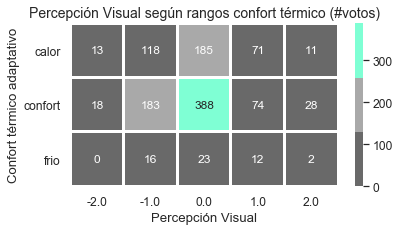

In [177]:
f, ax = plt.subplots(figsize=(6, 3))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vPercVis_conf, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax, cmap=palette), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Confort térmico adaptativo")
plt.xlabel("Percepción Visual")
plt.title("Percepción Visual según rangos confort térmico (#votos)", fontsize=14)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

In [178]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

#vSensTer_rangos_porc = vSensTer_rangos.div(vSensTer_rangos.sum(axis=1), axis=0).mul(100).round(1)
vPercVis_conf_porc = vPercVis_conf.div(vPercVis_conf.sum(axis=1), axis=0).round(3)
vPercVis_conf_porc

SensaciónVisual,-2.0,-1.0,0.0,1.0,2.0
ConfortAdap,,,,,
calor,0.033,0.296,0.465,0.178,0.028
confort,0.026,0.265,0.562,0.107,0.041
frio,0.000,0.302,0.434,0.226,0.038


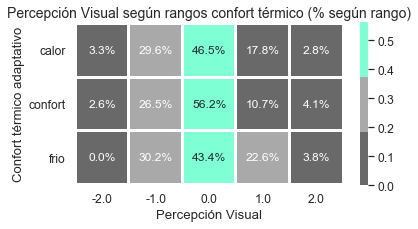

In [179]:
f, ax = plt.subplots(figsize=(6, 3))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vPercVis_conf_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax, cmap=palette, square=True), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Confort térmico adaptativo")
plt.xlabel("Percepción Visual")
plt.title("Percepción Visual según rangos confort térmico (% según rango)", fontsize=14)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

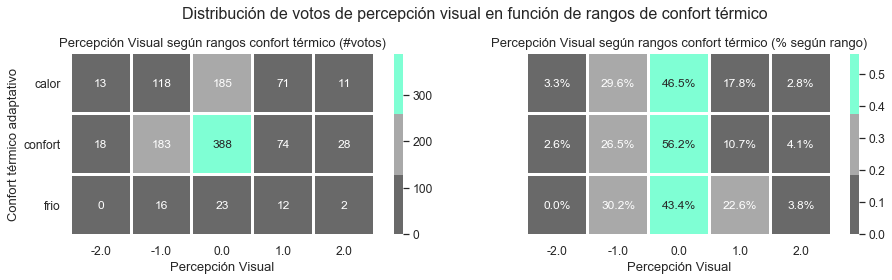

In [180]:
 # Graficando percepción según rangos de confort, en #votos y %´s

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(15,4), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vPercVis_conf, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square=True, #con square garantizo q la celda salga cuadrada y no se deforme
            cbar=True, cbar_kws={"shrink": .83}), #con este controlo el tamaño la altura de la leyenda
ax1.set_ylabel("Confort térmico adaptativo", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Visual", fontsize=13)
ax1.set_title("Percepción Visual según rangos confort térmico (#votos)", fontsize=13)

ax1.set_yticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero


# Gráfico 2
sns.heatmap(vPercVis_conf_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square=True,
           cbar=True, cbar_kws={"shrink": .83}), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Percepción Visual", fontsize=13)
ax2.set_title("Percepción Visual según rangos confort térmico (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de percepción visual en función de rangos de confort térmico", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### **6.B. ¿Cómo se distribuyen los votos de percepción visual (EN RANGOS) según rangos de confort adapatativo?**

In [184]:
vPercVis_confB = vPercVis_conf
vPercVis_confB

SensaciónVisual,-2.0,-1.0,suficiente,1.0,2.0,oscuro,excesivo
ConfortAdap,,,,,,,
calor,13,118,185,71,11,131,82
confort,18,183,388,74,28,201,102
frio,0,16,23,12,2,16,14


In [185]:
# sumo columnas q me interesa agrupar en una sola categoría
suma_oscuro_perc = vPercVis_confB[-2]+vPercVis_confB[-1]
suma_oscuro_perc

#creo una columna que contiene resultado de esa suma
vPercVis_confB["oscuro"]=suma_oscuro_perc

suma_excesivo_perc = vPercVis_confB[+2]+vPercVis_confB[+1]
suma_excesivo_perc
vPercVis_confB["excesivo"]=suma_excesivo_perc

vPercVis_confB

vPercVis_confB.rename(columns={0:"suficiente"}, inplace=True)
vPercVis_confB

# reorganizo y selecciono solo las columnas q me interesan
vPercVis_confB = vPercVis_confB[["oscuro","suficiente","excesivo"]]
vPercVis_confB

SensaciónVisual,oscuro,suficiente,excesivo
ConfortAdap,,,
calor,131,185,82
confort,201,388,102
frio,16,23,14


In [186]:
vPercVis_confB_porc = vPercVis_confB.div(vPercVis_confB.sum(axis=1), axis=0).round(3)
vPercVis_confB_porc

SensaciónVisual,oscuro,suficiente,excesivo
ConfortAdap,,,
calor,0.329,0.465,0.206
confort,0.291,0.562,0.148
frio,0.302,0.434,0.264


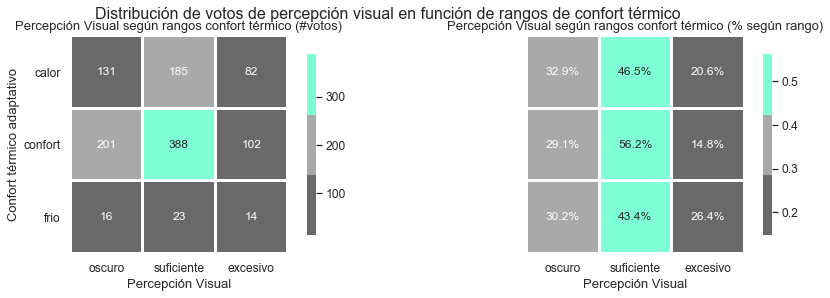

In [188]:
 # Graficando percepción según rangos de confort, en #votos y %´s

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(15,4), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vPercVis_confB, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square=True, #con square garantizo q la celda salga cuadrada y no se deforme
            cbar=True, cbar_kws={"shrink": .83}), #con este controlo el tamaño la altura de la leyenda
ax1.set_ylabel("Confort térmico adaptativo", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Percepción Visual", fontsize=13)
ax1.set_title("Percepción Visual según rangos confort térmico (#votos)", fontsize=13)

ax1.set_yticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero


# Gráfico 2
sns.heatmap(vPercVis_confB_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square=True,
           cbar=True, cbar_kws={"shrink": .83}), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Percepción Visual", fontsize=13)
ax2.set_title("Percepción Visual según rangos confort térmico (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de percepción visual en función de rangos de confort térmico", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

### **7. ¿Cómo se distribuyen los votos de preferencia visual según rangos de confort adapatativo?**

In [189]:
vPrefVis_conf = zc_final.pivot_table(index='ConfortAdap',
                                      columns='PreferenciaVisual',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count', fill_value=0)

#vPrefVis_conf.sum()
vPrefVis_conf

PreferenciaVisual,-2.0,-1.0,0.0,1.0,2.0
ConfortAdap,,,,,
calor,3,15,167,147,66
confort,11,53,297,202,128
frio,1,7,19,24,2


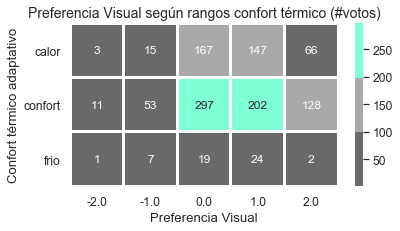

In [190]:
f, ax = plt.subplots(figsize=(6, 3))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vPrefVis_conf, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax, cmap=palette), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Confort térmico adaptativo")
plt.xlabel("Preferencia Visual")
plt.title("Preferencia Visual según rangos confort térmico (#votos)", fontsize=14)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

In [191]:
# Saco porcentajes en fxn de cada línea (rango en este caso)

vPrefVis_conf_porc = vPrefVis_conf.div(vPrefVis_conf.sum(axis=1), axis=0).round(3)
vPrefVis_conf_porc

PreferenciaVisual,-2.0,-1.0,0.0,1.0,2.0
ConfortAdap,,,,,
calor,0.008,0.038,0.420,0.369,0.166
confort,0.016,0.077,0.430,0.292,0.185
frio,0.019,0.132,0.358,0.453,0.038


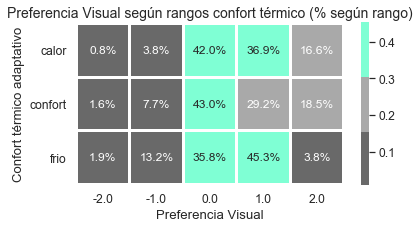

In [192]:
f, ax = plt.subplots(figsize=(6, 3))

#palette = ["dimgray", "lightgray", "aquamarine"]
palette = ["dimgray", "darkgray", "aquamarine"]

sns.heatmap(vPrefVis_conf_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax, cmap=palette, square=True), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.ylabel("Confort térmico adaptativo")
plt.xlabel("Preferencia Visual")
plt.title("Preferencia Visual según rangos confort térmico (% según rango)", fontsize=14)

# Escalando texto puedo ir ejecutando estas diferentes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

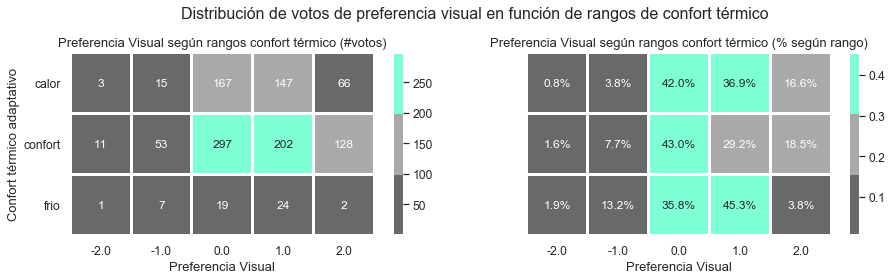

In [193]:
 # Graficando preferencia según rangos de confort, en #votos y %´s.

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(15,4), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1
sns.heatmap(vPrefVis_conf, annot=True, annot_kws={"size": 12},
            fmt="g", linewidths=2,
            ax=ax1, cmap=palette, square=True, #con square garantizo q la celda salga cuadrada y no se deforme
            cbar=True, cbar_kws={"shrink": .83}), #con este controlo el tamaño la altura de la leyenda
ax1.set_ylabel("Confort térmico adaptativo", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Preferencia Visual", fontsize=13)
ax1.set_title("Preferencia Visual según rangos confort térmico (#votos)", fontsize=13)

ax1.set_yticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero


# Gráfico 2
sns.heatmap(vPrefVis_conf_porc, annot=True, annot_kws={"size": 12},
            fmt=".1%", linewidths=2,
            ax=ax2, cmap=palette, square=True,
           cbar=True, cbar_kws={"shrink": .83}), 
            #annot_kws={"size": 12})#, cbar=False )
            #ax=ax)#, vmin=0, vmax=300, cmap="YlGnBu")
ax2.set_ylabel(" ", fontsize=13)
ax2.set_xlabel("Preferencia Visual", fontsize=13)
ax2.set_title("Preferencia Visual según rangos confort térmico (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de preferencia visual en función de rangos de confort térmico", fontsize=16)

# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero

*<font color="red">
**Aquí retomo gráficos que se podían hacer al cruzar lo térmico en el eje X con rangos visuales en el eje Y (pregunta 2)**
</font>*

### **2.2 ¿Existe alguna relación entre los rangos de confort térmico adaptativo con los votos de preferencia visual?**

NOTA: Algo similar se ha tratado de responder más arriba, solo q aquí se agruparán respuestas de votos visuales para tener una tabla más reducida

In [197]:
vPrefVisRango_conf = zc_final.pivot_table(index='ConfortAdap',
                                      columns='PreferenciaVisual',
                                        values='Ciudad', #ver nota sobre esto abajo 
                                    #independiente de la q ponga, la tabla da lo mismo
                                        aggfunc='count', fill_value=0)

#vPrefVisRango_conf.sum()
vPrefVisRango_conf

PreferenciaVisual,-2.0,-1.0,0.0,1.0,2.0
ConfortAdap,,,,,
calor,3,15,167,147,66
confort,11,53,297,202,128
frio,1,7,19,24,2


In [198]:
# sumo columnas q me interesa agrupar en una sola categoría
menos_ilu = vPrefVisRango_conf[-2]+vPrefVisRango_conf[-1]
menos_ilu

#creo una columna que contiene resultado de esa suma
vPrefVisRango_conf["menos iluminado"]=menos_ilu
vPrefVisRango_conf

# sumo columnas q me interesa agrupar en una sola categoría
mas_ilu = vPrefVisRango_conf[2]+vPrefVisRango_conf[1]
mas_ilu

#creo una columna que contiene resultado de esa suma
vPrefVisRango_conf["mas iluminado"]=mas_ilu
vPrefVisRango_conf

vPrefVisRango_conf.rename(columns={0:"ni más ni menos"}, inplace=True)
vPrefVisRango_conf

#Selecciono columnas según lo q necesito
vPrefVisRango_conf = vPrefVisRango_conf[['menos iluminado', 'ni más ni menos', 'mas iluminado']]

vPrefVisRango_conf


PreferenciaVisual,menos iluminado,ni más ni menos,mas iluminado
ConfortAdap,,,
calor,18,167,213
confort,64,297,330
frio,8,19,26


In [199]:
vPrefVisRango_conf.sum()

PreferenciaVisual
menos iluminado     90
ni más ni menos    483
mas iluminado      569
dtype: int64

In [205]:
#Sacando porcentajes (cada fila suma 100%)
#Creo DF aparte para sacar porcentajes
vPrefVisRango_conf_porc = vPrefVisRango_conf

vPrefVisRango_conf_porc = vPrefVisRango_conf_porc.div(vPrefVisRango_conf_porc.sum(axis=1), axis=0).round(3)
vPrefVisRango_conf_porc

PreferenciaVisual,menos iluminado,ni más ni menos,mas iluminado
ConfortAdap,,,
calor,0.045,0.420,0.535
confort,0.093,0.430,0.478
frio,0.151,0.358,0.491


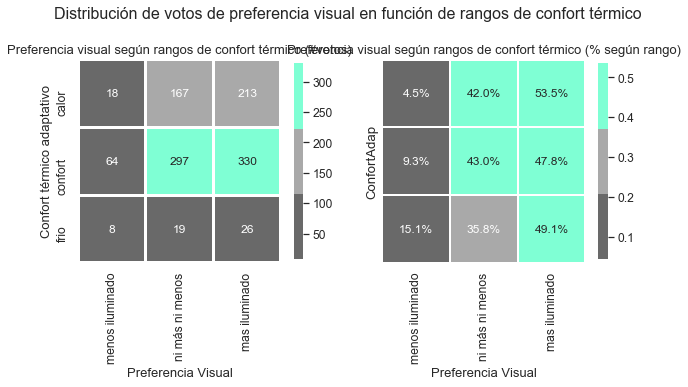

In [206]:
# Graficando los dos de preferencia previos

#fig, (ax1, ax2) = plt.subplots(1,2)

fig, (ax1, ax2) = plt.subplots(1,2, 
                figsize=(10,4.5), sharey='row')

palette = ["dimgray", "darkgray", "aquamarine"]


# Gráfico 1 (cantidad de votos y cuenta absoluta)
sns.heatmap(vPrefVisRango_conf, annot=True, fmt="d", linewidths=2,
            ax=ax1, cmap=palette, annot_kws={"size": 12}, square = True,
           cbar_kws={"shrink": .8}), 
ax1.set_ylabel("Confort térmico adaptativo", fontsize=13)#, labelpad=2)
ax1.set_xlabel("Preferencia Visual", fontsize=13)
ax1.set_title("Preferencia visual según rangos de confort térmico (#votos)", fontsize=13)

# Escalando texto puedo ir ejecutando estas direntes escaladas
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero



# Gráfico 2
#pVis_pTer_porc

sns.heatmap(vPrefVisRango_conf_porc, annot=True, fmt=".1%", linewidths=1,
            ax=ax2, cmap=palette, annot_kws={"size": 12}, square = True,
           cbar_kws={"shrink": .8}), 

ax2.set_xlabel("Preferencia Visual", fontsize=13)
ax2.set_title("Preferencia visual según rangos de confort térmico (% según rango)", fontsize=13)

plt.suptitle("Distribución de votos de preferencia visual en función de rangos de confort térmico", fontsize=16)


# Escalando texto puedo ir ejecutando estas direntes escaladas
# (plotear por lo menos dos veces para q funcione)
sns.set(font_scale=0) #primero lo vuelvo demasiado pequeño
sns.set(font_scale=1) #luego lo pongo en un tamaño relativamente pequeño
sns.set(font_scale=1.1) #con este final/ logro el q quiero